In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
%matplotlib nbagg

## Data files ##

In [2]:
data1 =  pd.read_csv('datafile1.csv', names = ['X1', 'X2', 'Y'])
data2 =  pd.read_csv('datafile2.csv', names = ['X1', 'X2', 'Y'])
data3 =  pd.read_csv('datafile3.csv', names = ['X1', 'X2', 'Y'])
data4 =  pd.read_csv('datafile4.csv', names = ['X1', 'X2', 'Y'])


# Data set 1

## Scatter plot ##

checking manually if the given data is linearly separable

<IPython.core.display.Javascript object>


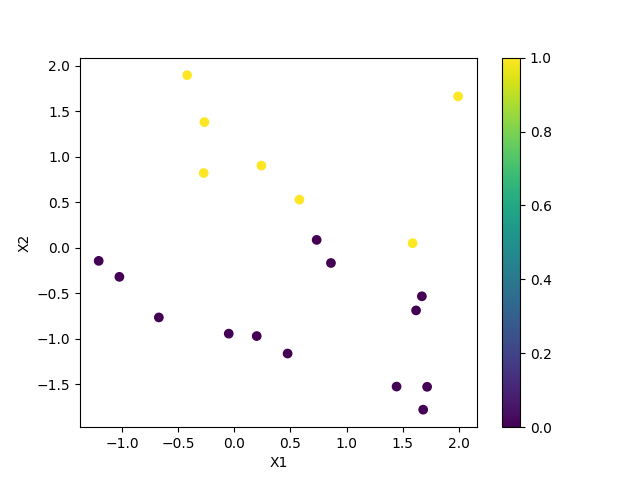

In [3]:
plt.scatter(data1['X1'], data1['X2'], c = data1['Y'])
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show() 

## Calculating the optimum weights via perceptron training ##

In [54]:
weight = np.random.random((3, 1))
weights = []
p = 0
count = 0
learning_rate = .1
summ = 1
# stochastic gradient method
while(p <= 20 or summ != 0 ):
    summ = 0
    for i in range(0, len(data1)):
        # output value
        y_cap = data1['X1'][i] * weight[1] + data1['X2'][i] * weight[2] + weight[0]
        if y_cap >=0: 
            y_cap = 1
        else: 
            y_cap = 0
        # error 
        error = data1['Y'][i] - y_cap
        
        #calculating the delta weights
        delta_weight1 = learning_rate * (error) * data1['X1'][i]
        delta_weight2 = learning_rate * (error) * data1['X2'][i]
        weights.append(np.array([weight[0], weight[1], weight[2]]).reshape(3, 1))
        
        #updating weights
        weight[1] = weight[1] + delta_weight1
        weight[2] = weight[2] + delta_weight2
        weight[0] = weight[0] + learning_rate * (error)
        summ += abs(error)
        print (summ)
    p += 1


1
2
2
2
3
3
3
3
3
4
4
4
5
5
5
5
5
5
5
5
0
0
0
0
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


#### Error

In [31]:
print (error)


0


## plot check for linear separable data ##

using x1*w1 + x2*w2 + bias = 0

<IPython.core.display.Javascript object>


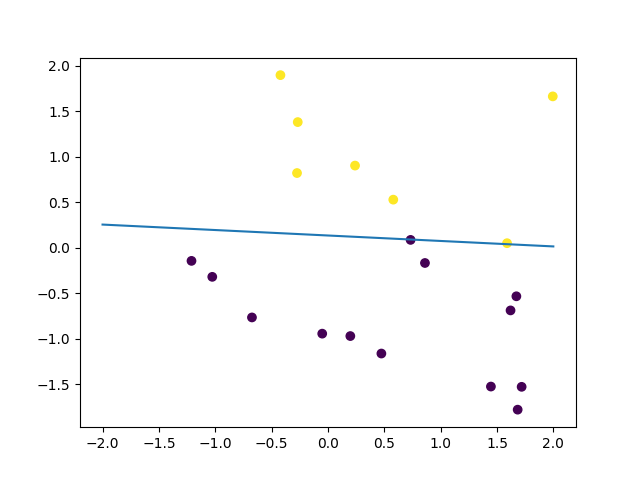

In [32]:
x1 = [-2, -1, 0, 1, 2]
x2 = []

for i in x1:
    s = ((-(weight[1] / weight[2]) * i ) - weight[0] / weight[2])
    x2.append(s)

plt.scatter(data1['X1'], data1['X2'], c = data1['Y'])
plt.plot(x1,x2)
plt.show()

## Animation for analysing how to get the optimum weights

<IPython.core.display.Javascript object>


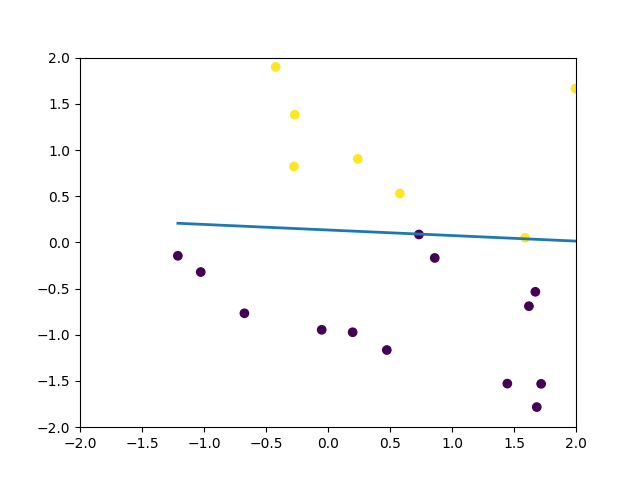

In [33]:
# Defining the function of x1*w1 + x2*w2 + bias = 0
def func_x2(x1, w):
    return ((-(w[1] / w[2]) * x1 ) - w[0] / w[2])


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim = (-2, 2), ylim = (-2, 2))
line, = ax.plot([], [], lw = 2)

x1 = data1['X1']
x2 = data1['X2']
y = data1['Y']

#w = pd.Series(w)

ax.scatter(x1, x2, c = y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1), max(x1)]
    y = func_x2(x, weights[i])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               init_func = init,
                               frames = len(weights), 
                               interval = 20,
                               blit = True,
                               repeat = False)


plt.show()

# Conclusion

#### The data set is linearly separable as seen clearly from the line of separation
        with error = 0
        and model: x1(0.16000989) + x2(0.76983968) + (-0.18450629) = 0

# Data Set 2

## Scatter plot ##

<IPython.core.display.Javascript object>


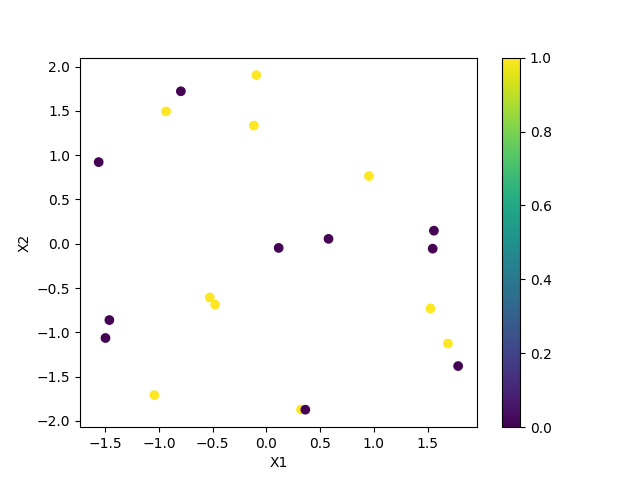

In [34]:
plt.scatter(data2['X1'], data2['X2'], c = data2['Y'])
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Analysing the scatter plot manually, the 0's and 1's seem linearly inseparable. but lets see

## Calculating the optimum weights via perceptron training ##

In [35]:
weight = np.random.random((3, 1))
weights = []
p = 0
learning_rate = .1
summ = 1
# stochastic gradient method
while(p <= 20 or summ != 0 ):
    summ = 0
    for i in range(0,len(data1)):
        # output value
        y_cap = data2['X1'][i] * weight[1] + data2['X2'][i] * weight[2] + weight[0]
        if y_cap  >= 0: 
            y_cap = 1
        else: 
            y_cap = 0
        # error 
        error = data2['Y'][i] - y_cap
        
        #calculating the delta weights
        delta_weight1 = learning_rate * (error) * data2['X1'][i]
        delta_weight2 = learning_rate * (error) * data2['X2'][i]
        weights.append(np.array([weight[0], weight[1], weight[2]]).reshape(3,1))
        #updating weights
        weight[1] = weight[1] + delta_weight1
        weight[2] = weight[2] + delta_weight2
        weight[0] = weight[0] + learning_rate * (error)
        summ += error
    p += 1


#### Error

In [36]:
print (error)

1


## plot check for linear separable data ##

using x1*w1 + x2*w2 + bias = 0

<IPython.core.display.Javascript object>


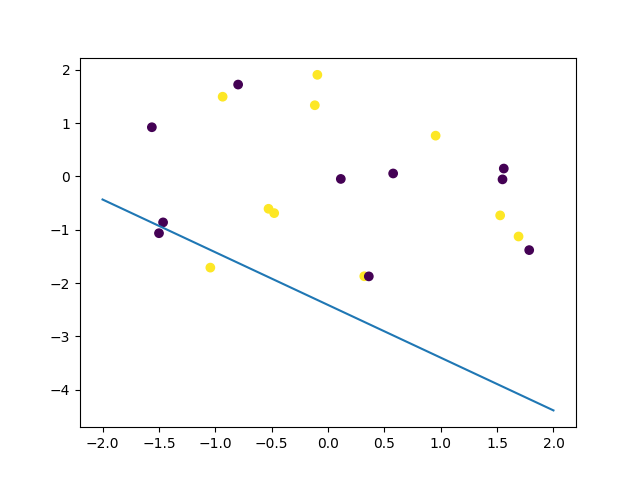

In [37]:
x1 = [-2, -1, 0, 1, 2]
x2 = []

for i in x1:
    s = ((-(weight[1] / weight[2]) * i ) - weight[0] / weight[2])
    x2.append(s)

plt.scatter(data2['X1'], data2['X2'], c = data2['Y'])
plt.plot(x1, x2)
plt.show()

## Analysing how to get optimum weights

<IPython.core.display.Javascript object>


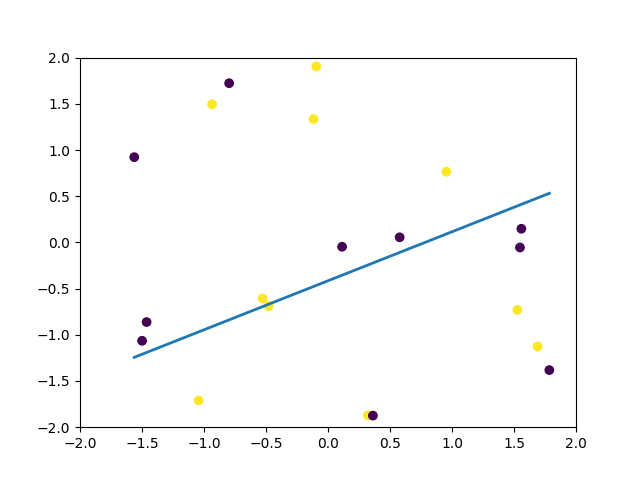

In [39]:
# Defining the function of x1*w1 + x2*w2 + bias = 0
def func_x2(x1, w):
    return ((-(w[1] / w[2]) * x1 ) - w[0] / w[2])


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim = (-2, 2), ylim = (-2, 2))
line, = ax.plot([], [], lw = 2)

x1 = data2['X1']
x2 = data2['X2']
y = data2['Y']

ax.scatter(x1, x2, c = y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1), max(x1)]
    y = func_x2(x, weights[i])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func = init,
                               frames = len(weights), interval = 20, blit = True, repeat = False)


plt.show()


### Conclusion 

#### Since the separability line is unable to decide the separation, therefore the given dataset is not linearly separable
        with error = 1 or 100%
        and model equation:  x1(0.05609375) + x2(-0.01830498) + 0.12839191 = 0

# Data set 3

## Scatter plot 

<IPython.core.display.Javascript object>


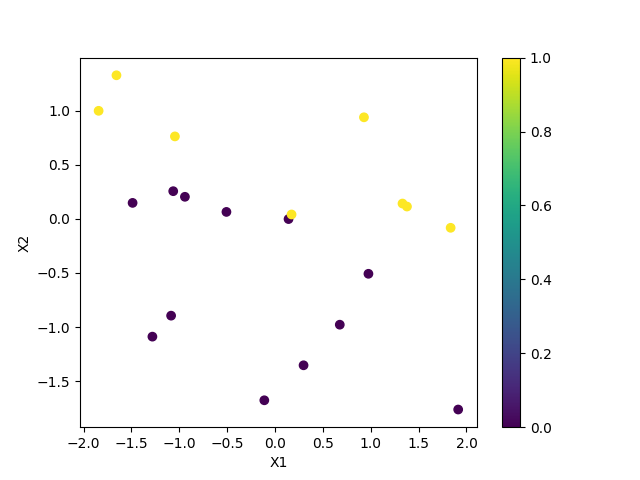

In [40]:
plt.scatter(data3['X1'], data3['X2'], c = data3['Y'])
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

from the scatter plot, the data seems to be linearly separable

## Perceptron rule using stochastic gradient rule

In [44]:
weight = np.random.random((3, 1))
weights = []
p = 0
learning_rate = .1
summ = 1
# stochastic gradient method
while(p <= 20 or summ != 0):
    summ = 0
    for i in range(0,len(data1)):
        # output value
        y_cap = data3['X1'][i] * weight[1] + data3['X2'][i] * weight[2] + weight[0]
        if y_cap >=0: 
            y_cap = 1
        else: 
            y_cap = 0
        # error 
        error = data3['Y'][i] - y_cap
        #er.append(data1['Y'][i] - y_cap)
        #calculating the delta weights
        delta_weight1 = learning_rate * (error) * data3['X1'][i]
        delta_weight2 = learning_rate * (error) * data3['X2'][i]
        weights.append(np.array([weight[0], weight[1], weight[2]]).reshape(3, 1))
        #updating weights
        weight[1] = weight[1] + delta_weight1
        weight[2] = weight[2] + delta_weight2
        weight[0] = weight[0] + learning_rate * (error)
        summ += error
    p += 1


### Error

In [49]:
print (error)


0


## plot check for linear separable data ##

using x1*w1 + x2*w2 + bias = 0

<IPython.core.display.Javascript object>


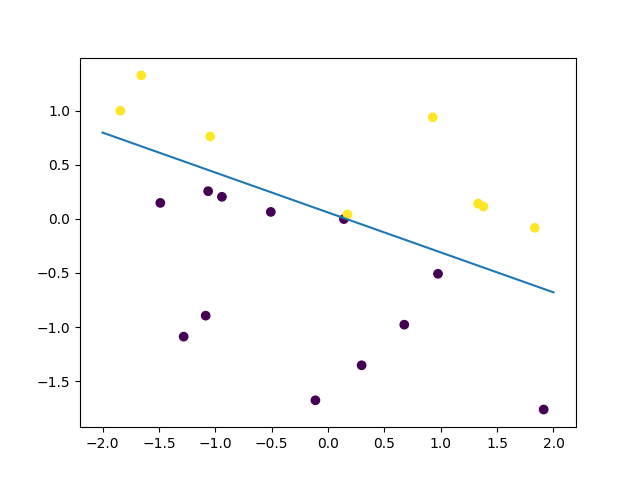

In [46]:
x1 = [-2, -1, 0, 1, 2]
x2 = []

for i in x1:
    s = ((-(weight[1] / weight[2]) * i ) - weight[0] / weight[2])
    x2.append(s)

plt.scatter(data3['X1'], data3['X2'], c = data3['Y'])
plt.plot(x1, x2)
plt.show()

# How optimum weights got the linear seprability done 

<IPython.core.display.Javascript object>


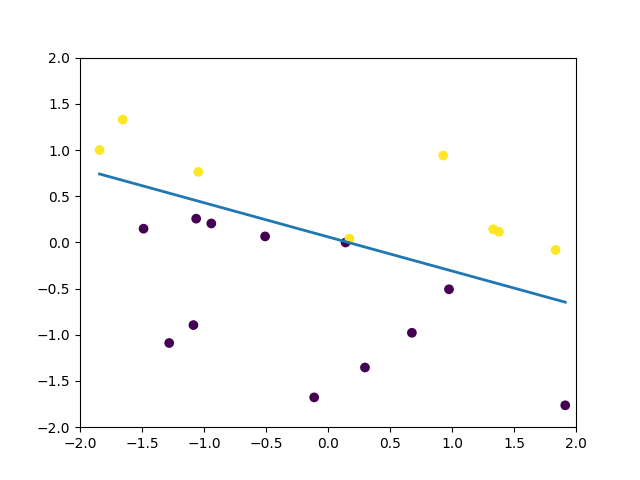

In [47]:
# Defining the function of x1*w1 + x2*w2 + bias = 0
def func_x2(x1, w):
    return ((-(w[1] / w[2]) * x1 ) - w[0] / w[2])


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim = (-2, 2), ylim = (-2, 2))
line, = ax.plot([], [], lw = 2)

x1 = data3['X1']
x2 = data3['X2']
y = data3['Y']

ax.scatter(x1, x2, c = y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1), max(x1)]
    y = func_x2(x, weights[i])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func = init,
                               frames = len(weights), interval = 20, blit = True)


plt.show()


### Conclusion

#### Since the line separates the given data, therefore this set is linearly separable
        with error = 0
        and model: x1(0.30502816) + x2(0.82566281) -0.04951087 = 0

# Data Set 4 

## scatter plot 

<IPython.core.display.Javascript object>


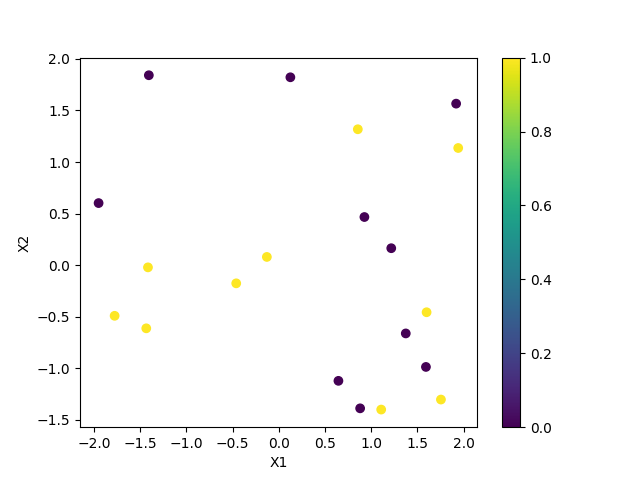

In [50]:
plt.scatter(data4['X1'], data4['X2'], c = data4['Y'])
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

The data set is clearly not separable. 